In [1]:
import igraph
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import pynauty
from scipy.sparse.linalg import expm_multiply
from sympy.combinatorics import Permutation, PermutationGroup

from qlinks.computation_basis import ComputationBasis
from qlinks.lattice.square_lattice import SquareLattice
from qlinks.model.quantum_link_model import QuantumLinkModel
from qlinks.symmetry.automorphism import Automorphism
from qlinks.visualizer.basis import BasisVisualizer

from utils import format_custom_index, setup_model, setup_igraph, load_from_npz

np.set_printoptions(threshold=np.inf)
pd.set_option("display.max_rows", None)

# Quantum Link/Dimer Model

In [29]:
coup_j, coup_rk = (1, -0.7)
basis, model = setup_model(
    "qlm", lattice_shape=(4, 4), coup_j=coup_j, coup_rk=coup_rk
)
evals, evecs = np.linalg.eigh(model.hamiltonian.toarray())

2024-07-22 14:36:32 [constraint_programming.py] INFO: CpSolverResponse summary:
status: OPTIMAL
objective: 0
best_bound: 0
integers: 32
booleans: 32
conflicts: 609
branches: 24393
propagations: 88345
integer_propagations: 108550
restarts: 3014
lp_iterations: 5436
walltime: 0.231036
usertime: 0.231036
deterministic_time: 0.121793
gap_integral: 0
solution_fingerprint: 0x1cb2e4843e05e07a

2024-07-22 14:36:32 [constraint_programming.py] INFO: Found 990 optimal solutions.


In [16]:
# basis.dataframe.to_parquet("qdm_8x4_lattice.parquet", index=False)
basis = ComputationBasis.from_parquet("data/qlm_6x4_lattice.parquet")
coup_j, coup_rk = (1, 1)
model = QuantumLinkModel(coup_j, coup_rk, (6, 4), basis)

In [3]:
# evals, evecs = np.load("data/qlm_6x4_coup_j_1_coup_rk_0_eigs.npz").values()

evals = load_from_npz("data/qlm_6x4_coup_j_1_coup_rk_0_eigs.npz", "evals")
evecs = load_from_npz("data/qlm_6x4_coup_j_1_coup_rk_0_eigs.npz", "evecs")

In [32]:
df = basis.dataframe.copy(deep=True)
df.index = format_custom_index(df.index)
df

0   1   2   3   4   5   6   7   8   9   ...  22  23  24  25  \
(0) 84258735       0   0   0   0   0   1   0   1   0   0  ...   1   1   1   0   
(1) 88518063       0   0   0   0   0   1   0   1   0   1  ...   0   1   1   0   
(2) 88534701       0   0   0   0   0   1   0   1   0   1  ...   1   0   1   0   
(3) 88843695       0   0   0   0   0   1   0   1   0   1  ...   0   1   1   0   
(4) 88860333       0   0   0   0   0   1   0   1   0   1  ...   1   0   1   0   
(5) 88861605       0   0   0   0   0   1   0   1   0   1  ...   1   1   1   0   
(6) 93728175       0   0   0   0   0   1   0   1   1   0  ...   0   1   1   0   
(7) 93744813       0   0   0   0   0   1   0   1   1   0  ...   1   0   1   0   
(8) 93765165       0   0   0   0   0   1   0   1   1   0  ...   1   0   0   0   
(9) 94053807       0   0   0   0   0   1   0   1   1   0  ...   0   1   1   0   
(10) 94070445      0   0   0   0   0   1   0   1   1   0  ...   1   0   1   0   
(11) 94071717      0   0   0   0   0   1   0   1   1   0  ...   1   1   1   0   
(12) 94090797      0   0   0   0   0   1   0   1   1   0  ...   1   0   0   0   
(13) 94092069      0   0   0   0   0   1   0   1   1   0  ...   1   1   0   0   
(14) 95356335      0   0   0   0   0   1   0   1   1   0  ...   0   1   1   0   
(15) 95372973      0   0   0   0   0   1   0   1   1   0  ...   1   0   1   0   
(16) 95374245      0   0   0   0   0   1   0   1   1   0  ...   1   1   1   0   
(17) 95393325      0   0   0   0   0   1   0   1   1   0  ...   1   0   0   0   
(18) 95394597      0   0   0   0   0   1   0   1   1   0  ...   1   1   0   0   
(19) 95399685      0   0   0   0   0   1   0   1   1   0  ...   1   1   0   0   
(20) 286374843     0   0   0   1   0   0   0   1   0   0  ...   1   1   1   0   
(21) 287677371     0   0   0   1   0   0   0   1   0   0  ...   1   1   1   0   
(22) 287682459     0   0   0   1   0   0   0   1   0   0  ...   1   1   1   0   
(23) 290634171     0   0   0   1   0   0   0   1   0   1  ...   0   1   1   0   
(24) 290650809     0   0   0   1   0   0   0   1   0   1  ...   1   0   1   0   
(25) 291936699     0   0   0   1   0   0   0   1   0   1  ...   0   1   1   0   
(26) 291941787     0   0   0   1   0   0   0   1   0   1  ...   0   1   1   0   
(27) 291953337     0   0   0   1   0   0   0   1   0   1  ...   1   0   1   0   
(28) 291958425     0   0   0   1   0   0   0   1   0   1  ...   1   0   1   0   
(29) 292262331     0   0   0   1   0   0   0   1   0   1  ...   0   1   1   0   
(30) 292267419     0   0   0   1   0   0   0   1   0   1  ...   0   1   1   0   
(31) 292278969     0   0   0   1   0   0   0   1   0   1  ...   1   0   1   0   
(32) 292284057     0   0   0   1   0   0   0   1   0   1  ...   1   0   1   0   
(33) 292285329     0   0   0   1   0   0   0   1   0   1  ...   1   1   1   0   
(34) 297146811     0   0   0   1   0   0   0   1   1   0  ...   0   1   1   0   
(35) 297151899     0   0   0   1   0   0   0   1   1   0  ...   0   1   1   0   
(36) 297163449     0   0   0   1   0   0   0   1   1   0  ...   1   0   1   0   
(37) 297168537     0   0   0   1   0   0   0   1   1   0  ...   1   0   1   0   
(38) 297188889     0   0   0   1   0   0   0   1   1   0  ...   1   0   0   0   
(39) 297472443     0   0   0   1   0   0   0   1   1   0  ...   0   1   1   0   
(40) 297477531     0   0   0   1   0   0   0   1   1   0  ...   0   1   1   0   
(41) 297489081     0   0   0   1   0   0   0   1   1   0  ...   1   0   1   0   
(42) 297494169     0   0   0   1   0   0   0   1   1   0  ...   1   0   1   0   
(43) 297495441     0   0   0   1   0   0   0   1   1   0  ...   1   1   1   0   
(44) 297514521     0   0   0   1   0   0   0   1   1   0  ...   1   0   0   0   
(45) 297515793     0   0   0   1   0   0   0   1   1   0  ...   1   1   0   0   
(46) 336903870     0   0   0   1   0   1   0   0   0   0  ...   1   0   1   0   
(47) 337229502     0   0   0   1   0   1   0   0   0   0  ...   1   0   1   0   
(48) 337230774     0   0   0   1   0   1   0   0 

In [4]:
# evecs_df = pd.read_parquet("data/qlm_6x4_coup_j_1_coup_rk_-0.7_eigs.parquet")
evecs_df = pd.DataFrame.from_dict(
    {
        "eval": evals,
        "kin": [(evec.T @ model.kinetic_term @ evec).item() for evec in evecs.T],
        "pot": [(evec.T @ model.potential_term @ evec).item() for evec in evecs.T],
        "kin^2": [(evec.T @ model.kinetic_term @ model.kinetic_term @ evec).item() for evec in evecs.T],
        "pot^2": [(evec.T @ model.potential_term @ model.potential_term @ evec).item() for evec in evecs.T],
    }
)
evecs_df[evecs_df["kin"].abs() < 1e-12]

eval           kin       pot         kin^2      pot^2
416 -2.681649e-15  2.094762e-18  7.355568  1.326272e-29  58.281185
417 -2.562219e-15 -8.369116e-18  7.235133  1.572791e-29  57.025368
418 -2.400539e-15  2.848849e-18  7.217238  1.269573e-29  55.679759
419 -2.264218e-15  4.826929e-18  7.269566  1.582652e-29  57.071509
420 -2.248372e-15 -4.114148e-18  7.460274  1.516092e-29  60.062636
421 -2.231388e-15 -5.765517e-20  7.315187  1.485277e-29  57.693153
422 -2.138546e-15 -8.178640e-18  7.397667  1.341064e-29  58.804869
423 -2.056495e-15 -3.139122e-18  7.335250  1.360785e-29  57.420613
424 -2.050245e-15 -1.414223e-18  7.391789  1.156174e-29  58.587287
425 -2.038990e-15 -4.671201e-19  7.380240  1.424880e-29  57.556469
426 -2.012783e-15 -5.139621e-19  7.193353  1.281899e-29  55.135173
427 -1.975799e-15  4.302920e-18  7.425450  1.316412e-29  59.001469
428 -1.887368e-15  6.292864e-18  7.399257  1.183291e-29  58.661941
429 -1.863252e-15 -8.576898e-19  7.110266  1.353852e-29  55.901047
430 -1.821089e-15 -5.312454e-18  7.559740  1.276969e-29  61.858709
431 -1.800455e-15 -6.935501e-19  7.267571  1.281899e-29  57.460893
432 -1.762993e-15  9.536564e-19  7.182285  1.286829e-29  55.195566
433 -1.667039e-15 -1.141501e-17  7.166604  1.232595e-29  55.340268
434 -1.588409e-15 -3.057530e-18  7.159210  1.291760e-29  55.018319
435 -1.587606e-15 -1.079085e-18  7.092592  1.250468e-29  54.421665
436 -1.570037e-15 -5.426219e-19  7.247578  2.980415e-29  56.627627
437 -1.560596e-15 -1.781746e-18  7.212013  1.247386e-29  56.469856
438 -1.522962e-15 -3.961805e-18  7.246144  1.268957e-29  57.690625
439 -1.515929e-15  2.485343e-18  7.322860  1.398071e-29  58.127512
440 -1.504495e-15  2.286310e-18  7.255241  1.255398e-29  56.264713
441 -1.503690e-15 -1.514006e-18  7.045538  1.518557e-29  54.136801
442 -1.500672e-15  2.682387e-18  7.298368  1.212874e-29  57.648054
443 -1.485860e-15  7.689306e-19  7.145961  1.057952e-29  55.353389
444 -1.484578e-15  2.075664e-18  7.173362  1.281899e-29  55.620362
445 -1.427511e-15 -2.788204e-18  7.232163  1.306551e-29  55.935842
446 -1.398346e-15 -6.099780e-18  7.348038  1.235060e-29  58.378452
447 -1.323921e-15 -5.531137e-19  7.441625  1.226432e-29  59.006250
448 -1.299516e-15  7.984814e-19  7.266814  1.137685e-29  57.221842
449 -1.289175e-15 -1.048278e-18  7.334191  1.202088e-29  57.322147
450 -1.253256e-15  1.233051e-18  7.218447  1.334901e-29  56.137976
451 -1.218722e-15 -2.416908e-18  7.126242  1.146930e-29  54.687564
452 -1.178201e-15  2.999775e-18  7.362010  1.310865e-29  58.813675
453 -1.167946e-15 -2.440068e-18  7.319277  1.153709e-29  57.890934
454 -1.141340e-15  9.294887e-19  7.242684  1.222734e-29  57.250341
455 -1.066977e-15  6.831935e-18  7.304942  1.094545e-29  57.295126
456 -1.036860e-15  3.262091e-18  7.211469  1.147546e-29  55.826054
457 -1.007474e-15 -5.230596e-18  7.363407  1.060032e-29  57.727930
458 -1.002102e-15 -1.618660e-18  7.162699  1.074823e-29  55.090227
459 -9.643866e-16  3.470929e-18  7.417181  1.178361e-29  59.838533
460 -9.532729e-16 -4.585561e-19  7.365269  1.272038e-29  58.341131
461 -9.369977e-16 -1.162026e-17  7.102774  1.205478e-29  54.669628
462 -9.254224e-16 -1.807515e-18  7.214193  1.153170e-29  55.715238
463 -8.255622e-16 -3.404239e-18  7.061486  1.077288e-29  53.512704
464 -8.176399e-16  2.067929e-18  7.252254  1.094545e-29  56.493941
465 -7.900513e-16 -6.342477e-18  7.087737  1.180826e-29  54.175648
466 -7.687829e-16  1.964309e-18  6.996110  5.063501e-29  53.826276
467 -7.645196e-16  1.188115e-18  7.253469  1.136145e-29  56.945577
468 -7.623425e-16  4.253235e-18  7.225390  1.020589e-29  56.002692
469 -7.398856e-16  1.885110e-18  7.130186  1.229822e-29  54.630685
470 -7.186607e-16  2.934955e-18  7.253654  1.137685e-29  57.108157
471 -6.822388e-16 -1.312439e-18  7.105712  1.124127e-29  54.354624
472 -6.314873e-16  1.885808e-18  7.303185  1.173199e-29  57.242826
473 -5.990814e-16  5.339880e-18  7.337650  1.111185e-29  57.079134
474 -5.866945e-16 -3.149641e-18  7.525496  1.205478e-29  60.

In [6]:
evecs_df[(evecs_df["kin"].abs() - 2).abs() < 1e-12]

eval  kin       pot  kin^2      pot^2
229  -2.0  2.0  7.932285    4.0  64.323395
230  -2.0  2.0  7.979753    4.0  64.657453
231  -2.0  2.0  7.965243    4.0  64.709763
232  -2.0  2.0  7.976775    4.0  64.511051
233  -2.0  2.0  7.946337    4.0  64.426103
234  -2.0  2.0  7.948998    4.0  64.650757
235  -2.0  2.0  7.973975    4.0  64.374211
236  -2.0  2.0  7.935639    4.0  64.260875
237  -2.0  2.0  7.951003    4.0  64.297144
238  -2.0  2.0  7.955464    4.0  64.383061
239  -2.0  2.0  7.968857    4.0  64.498390
240  -2.0  2.0  7.968912    4.0  64.601120
241  -2.0  2.0  7.959554    4.0  64.484223
242  -2.0  2.0  7.970429    4.0  64.305937
243  -2.0  2.0  7.962953    4.0  64.315869
244  -2.0  2.0  7.973607    4.0  64.456305
245  -2.0  2.0  7.939556    4.0  64.428548
246  -2.0  2.0  7.928754    4.0  64.601509
743   2.0 -2.0  7.973471    4.0  64.400897
744   2.0 -2.0  7.960854    4.0  64.352798
745   2.0 -2.0  7.965011    4.0  64.438507
746   2.0 -2.0  7.949099    4.0  64.436392
747   2.0 -2.0  7.967259    4.0  64.345892
748   2.0 -2.0  7.917651    4.0  64.398717
749   2.0 -2.0  7.976166    4.0  64.522194
750   2.0 -2.0  7.964918    4.0  64.222515
751   2.0 -2.0  7.983661    4.0  64.366775
752   2.0 -2.0  7.974839    4.0  64.791292
753   2.0 -2.0  7.982854    4.0  64.807304
754   2.0 -2.0  7.955338    4.0  64.497738
755   2.0 -2.0  7.926508    4.0  64.445876
756   2.0 -2.0  7.938548    4.0  64.393373
757   2.0 -2.0  7.940193    4.0  64.325036
758   2.0 -2.0  7.950220    4.0  64.338782
759   2.0 -2.0  7.974729    4.0  64.619212
760   2.0 -2.0  7.936776    4.0  64.582414

In [ ]:
plt.plot(evecs[:, 39].T, linestyle="--", marker="o", color="red")
plt.grid()

In [ ]:
entropies = np.asarray([model.entropy(evecs[:, i], 2, 0) for i in range(basis.n_states)])
entropy_df = pd.Series(entropies, name="entropy")
entropy_df[entropy_df < 1.9]
# entropy_df.plot(style="o", grid=True)

In [30]:
aut = Automorphism(-model.kinetic_term)
aut.joint_partition.keys()

dict_keys([(2, 'A'), (4, 'A'), (5, 'A'), (6, 'B'), (8, 'A'), (8, 'B'), (9, 'B'), (10, 'A'), (12, 'B'), (16, 'A')])

In [36]:
aut.type_1_scars((6, 'B'))

[ScarDataHolder(eval=0, shape=(224, 12), node_idx=array([  1,   4,   7,   9,  11,  12,  15,  18,  21,  23,  43,  44,  47,
         50,  53,  55,  57,  58,  61,  64,  67,  68,  70,  71,  73,  83,
         88,  95, 104, 109, 116, 117, 119, 120, 123, 125, 144, 146, 149,
        152, 155, 157, 159, 160, 163, 166, 169, 171, 191, 192, 195, 196,
        198, 199, 201, 207, 212, 223, 232, 237, 244, 245, 247, 248, 251,
        253, 272, 274, 277, 280, 283, 285, 287, 288, 291, 294, 297, 306,
        311, 318, 319, 321, 322, 325, 327, 346, 348, 351, 352, 354, 355,
        357, 367, 372, 414, 416, 435, 437, 440, 441, 443, 444, 451, 456,
        465, 476, 481, 487, 489, 490, 492, 493, 496, 497, 499, 500, 502,
        508, 513, 524, 533, 538, 545, 546, 548, 549, 552, 554, 573, 575,
        617, 622, 632, 634, 635, 637, 638, 641, 643, 662, 664, 667, 668,
        670, 671, 678, 683, 692, 695, 698, 701, 702, 704, 706, 709, 712,
        715, 717, 736, 738, 741, 742, 744, 745, 752, 757, 766, 777, 782,
  

In [38]:
np.sum(aut.type_1_scars((6, 'B'))[0].evec, axis=0)

array([-1.73472348e-17,  1.73472348e-16, -1.79023463e-15, -5.41233725e-16,
        1.05818132e-16, -2.63677968e-16, -1.11022302e-16,  2.28983499e-16,
       -2.52835947e-16, -5.06539255e-16, -4.01588485e-16,  1.31838984e-16])

In [7]:
aut.type_3a_scars(8, fill_zeros=True)

2024-06-24 20:18:11 [automorphism.py] INFO: eval: -2.0, num of scars: 3
2024-06-24 20:18:11 [automorphism.py] INFO: eval: 0.0, num of scars: 9
2024-06-24 20:18:11 [automorphism.py] INFO: eval: 2.0, num of scars: 3
2024-06-24 20:18:11 [automorphism.py] INFO: eval: -2.0, num of scars: 3
2024-06-24 20:18:11 [automorphism.py] INFO: eval: 0.0, num of scars: 9
2024-06-24 20:18:11 [automorphism.py] INFO: eval: 2.0, num of scars: 3


[ScarDataHolder(eval=-2.0, shape=(110, 3), node_idx=array([ 29,  30,  31,  34,  35,  36,  39,  40,  41,  79,  80,  81,  82,
         89,  90,  91,  98, 100, 102, 105, 107, 110, 112, 128, 129, 130,
        131, 132, 133, 137, 140, 142, 299, 302, 303, 307, 308, 312, 313,
        329, 331, 332, 333, 334, 335, 338, 342, 343, 469, 470, 471, 472,
        473, 474, 475, 514, 515, 516, 517, 518, 519, 520, 646, 647, 651,
        654, 655, 656, 657, 658, 660, 676, 677, 681, 682, 686, 687, 690,
        847, 849, 852, 856, 857, 858, 859, 860, 861, 877, 879, 882, 884,
        887, 889, 891, 898, 899, 900, 907, 908, 909, 910, 948, 949, 950,
        953, 954, 955, 958, 959, 960])),
 ScarDataHolder(eval=0.0, shape=(110, 9), node_idx=array([ 29,  30,  31,  34,  35,  36,  39,  40,  41,  79,  80,  81,  82,
         89,  90,  91,  98, 100, 102, 105, 107, 110, 112, 128, 129, 130,
        131, 132, 133, 137, 140, 142, 299, 302, 303, 307, 308, 312, 313,
        329, 331, 332, 333, 334, 335, 338, 342, 343, 46

In [4]:
g = nx.from_scipy_sparse_array(-model.kinetic_term)
ig = igraph.Graph.from_networkx(g)

ntg = pynauty.Graph(
    ig.vcount(),
    directed=True,
    adjacency_dict=nx.to_dict_of_lists(g),
)
aut_gp = pynauty.autgrp(ntg)[0]

perm_gp = PermutationGroup([Permutation(p) for p in aut_gp])

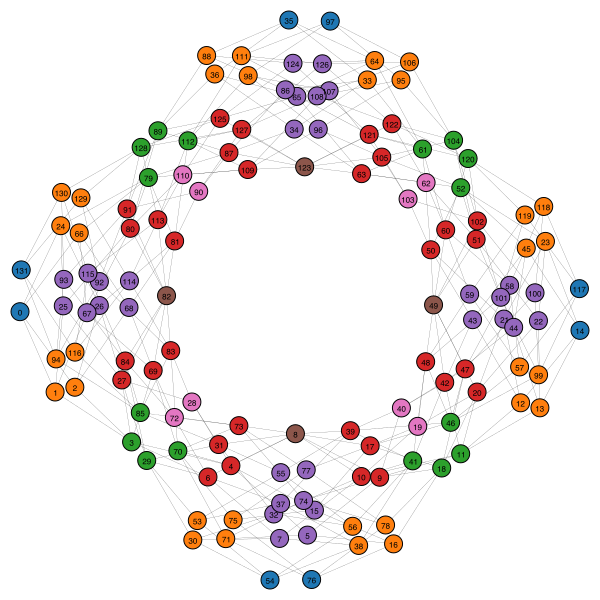

In [8]:
g = nx.from_scipy_sparse_array(-model.kinetic_term)

highlight = [
    # np.where(np.abs(evecs[:, 231]) > 1e-6)[0],
]
# highlight = list(aut.degree_partition.values())
highlight = perm_gp.orbits()
# highlight = list(nx.bipartite.sets(g))

highlight_color = list(mcolors.TABLEAU_COLORS.values())
# highlight_color = list(mcolors.CSS4_COLORS.values())
# cmap = plt.get_cmap('Set3')
# highlight_color = [mcolors.to_hex(cmap(i)) for i in range(cmap.N)]
# cmap = plt.get_cmap('Set2')
# highlight_color += [mcolors.to_hex(cmap(i)) for i in range(cmap.N)]
# highlight_color *= 2000
# highlight_color = [
#     "dimgray",
#     "whitesmoke",
#     "deepskyblue",
#     "yellowgreen",
#     "aqua",
#     "pink",
#     "tomato",
#     "royalblue",
#     "blueviolet",
#     "cornflowerblue",
#     "limegreen",
# ]

ig = setup_igraph(g, highlight, highlight_color)

degree = np.array(list(dict(g.degree).values()))
# (bipartite, types) = ig.is_bipartite(return_types=True)
# nodes = [int(n) for n in list(sub_sub_ig.vs["label"])]
# outer_boundary = list(nx.node_boundary(g, nodes))
# sub_ig = ig.induced_subgraph(np.append(nodes, outer_boundary))

# sub_ig = ig.induced_subgraph(np.where(degree == 8)[0])
# sub_ig = ig.induced_subgraph([34, 65, 86, 124, 88, 33, 36, 64, 121, 87, 63, 125, 96, 108, 107, 126])
# fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")
igraph.plot(
    ig,
    layout=ig.layout_kamada_kawai(),
    # layout=ig.layout_reingold_tilford(root=[0, 25, 50, 75]),
    # layout=ig.layout_bipartite(types=types),
    vertex_size=18,
    vertex_label_size=8,
    # vertex_label_dist=1.5,
    edge_width=0.2,
    # edge_color="darkgray",
    # target="qdm_subgraph_4x4.svg"
)

In [7]:
sub_components = sub_ig.connected_components(mode="weak")

for i, c in enumerate(sub_components):
    mat = nx.to_numpy_array(sub_ig.subgraph(c).to_networkx())
    print(i, mat.shape[0], mat.shape[0] - np.linalg.matrix_rank(mat))

0 1 1
1 1 1
2 110 32
3 1 1
4 1 1
5 1 1
6 1 1
7 1 1
8 1 1
9 1 1
10 1 1
11 1 1
12 1 1
13 110 32
14 1 1
15 1 1
16 1 1
17 1 1
18 1 1
19 1 1
20 1 1
21 1 1
22 1 1
23 1 1
24 1 1
25 1 1
26 1 1
27 1 1
28 1 1
29 1 1
30 1 1
31 1 1
32 1 1
33 1 1
34 1 1
35 1 1
36 1 1
37 1 1
38 1 1
39 1 1
40 1 1
41 1 1
42 1 1
43 1 1
44 1 1
45 1 1
46 1 1
47 1 1
48 1 1
49 1 1
50 1 1
51 1 1
52 1 1
53 1 1
54 1 1
55 1 1
56 1 1
57 1 1
58 1 1
59 1 1
60 1 1
61 1 1
62 1 1
63 1 1
64 1 1
65 1 1
66 1 1
67 1 1
68 1 1
69 1 1
70 1 1
71 1 1
72 1 1
73 1 1
74 1 1
75 1 1
76 1 1
77 1 1
78 1 1
79 1 1
80 1 1
81 1 1


In [24]:
sub_sub_ig = sub_ig.subgraph(sub_components[2])

In [9]:
evals, evecs = np.linalg.eigh(nx.to_numpy_array(sub_sub_ig.to_networkx()))

In [21]:
np.where(np.abs(evals - -2) < 1e-12)[0]

array([22, 23, 24])

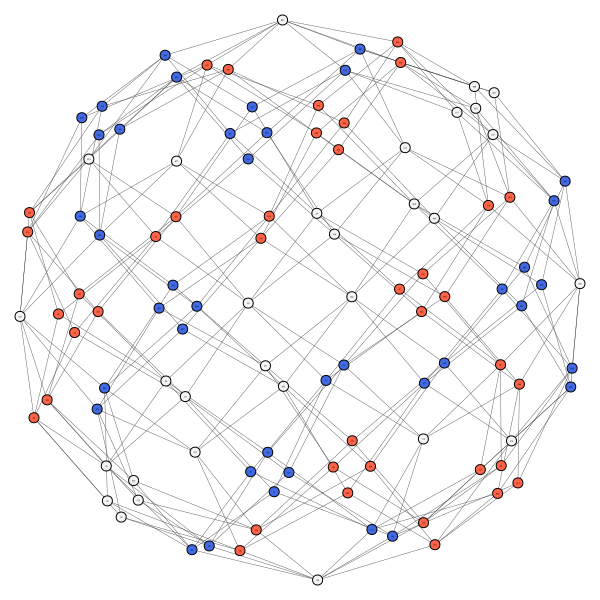

In [25]:
highlight = [
    np.where(evecs[:, 22] > 0.0001)[0],
    np.where(evecs[:, 22] < -0.0001)[0]
]
highlight_color = [
    "tomato",
    "royalblue",
]

color = sub_sub_ig.vs["color"]
color = ["whitesmoke" for _ in range(ig.vcount())]
for i, nodes in enumerate(highlight):
    for node in nodes:
        color[node] = highlight_color[i] #"whitesmoke"
sub_sub_ig.vs["color"] = color

igraph.plot(
    sub_sub_ig,
    layout=sub_sub_ig.layout_kamada_kawai(),
    vertex_size=10,
    vertex_label_size=2,
    edge_width=0.4,
    # edge_color="darkgray",
    # target="qdm_graph_4x2.svg"
)

In [56]:
scar = np.load("data/qlm_(6, 4)_type3a_scars_12.npz")
mask = np.isin(np.arange(32810), [int(s) for s in sub_sub_ig.vs["label"]])
state = scar['arr_0'][mask, :]

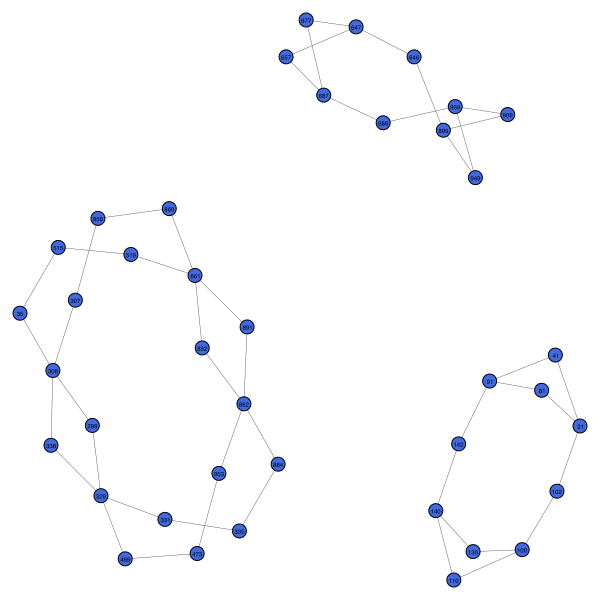

In [28]:
sub_3_ig = sub_sub_ig.subgraph(np.where(evecs[:, 22] < -1e-10)[0])

igraph.plot(
    sub_3_ig,
    layout=sub_3_ig.layout_kamada_kawai(),
    vertex_size=14,
    vertex_label_size=6,
    edge_width=0.4,
    # edge_color="darkgray",
    # target="qdm_graph_4x2.svg"
)

In [85]:
sub_components = sub_3_ig.connected_components(mode="weak")

for i, c in enumerate(sub_components):
    mat = nx.to_numpy_array(sub_3_ig.subgraph(c).to_networkx())
    print(i, mat.shape[0], mat.shape[0] - np.linalg.matrix_rank(mat))

0 40 14
1 40 14


In [66]:
label = [int(l) for l in sub_sub_ig.vs["label"]]
state = np.zeros((basis.n_states, 1))
state[label, :] = evecs[:, 254].reshape(-1, 1)

mask = np.isin(np.arange(basis.n_states), label)
incidence_mat = model.kinetic_term[np.ix_(mask, ~mask)]

incidence_mat.T @ evecs[:, 254]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [ ]:
degree = np.array(list(dict(g.degree).values()))

plt.plot(np.sort(degree), linestyle="--", marker="o")
plt.grid()
plt.show()

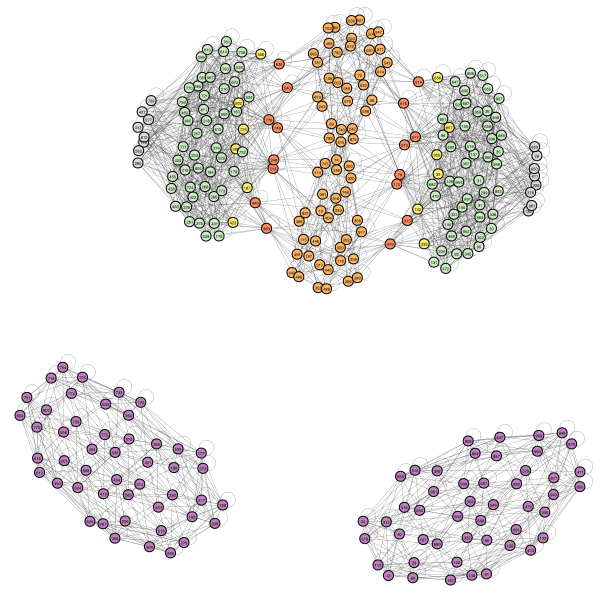

In [89]:
two_steps_mat = model.kinetic_term @ model.kinetic_term
g = nx.from_numpy_array(two_steps_mat)

# highlight = [
#     np.where(np.abs(evecs[:, 3]) > 0.0001)[0],
# ]
# highlight = group_indices_by_value(dict(g.degree))
highlight = perm_gp.orbits()
# highlight = list(nx.bipartite.sets(g))

# highlight_color = list(mcolors.TABLEAU_COLORS.values())
# highlight_color = list(mcolors.CSS4_COLORS.values())
cmap = plt.get_cmap('Set3')
highlight_color = [mcolors.to_hex(cmap(i)) for i in range(cmap.N)]
cmap = plt.get_cmap('Set2')
highlight_color += [mcolors.to_hex(cmap(i)) for i in range(cmap.N)]
# highlight_color = [
#     "dimgray",
#     "whitesmoke",
#     "deepskyblue",
#     "yellowgreen",
#     "aqua",
#     "pink",
#     "tomato",
#     "royalblue",
#     "blueviolet",
#     "cornflowerblue",
#     "limegreen",
# ]

ig = setup_igraph(g, highlight, highlight_color)

sub_ig = ig.induced_subgraph(np.where(degree == 8)[0])
# fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")
igraph.plot(
    sub_ig,
    layout=sub_ig.layout_kamada_kawai(),
    # layout=ig.layout_bipartite(types=types),
    vertex_size=10,
    vertex_label_size=4,
    edge_width=0.2,
    # edge_color="darkgray",
    target="qlm_bipartite_proj_4x4_d=8_by_orbits.svg"
)

In [90]:
sub_components = sub_ig.connected_components(mode="weak")

for i, c in enumerate(sub_components):
    mat = nx.to_numpy_array(sub_ig.subgraph(c).to_networkx())
    print(i, mat.shape[0], mat.shape[0] - np.linalg.matrix_rank(mat))

0 204 20
1 48 3
2 48 3


In [91]:
sub_sub_ig = sub_ig.subgraph(sub_components[0])

evals, evecs = np.linalg.eigh(nx.to_numpy_array(sub_sub_ig.to_networkx()))

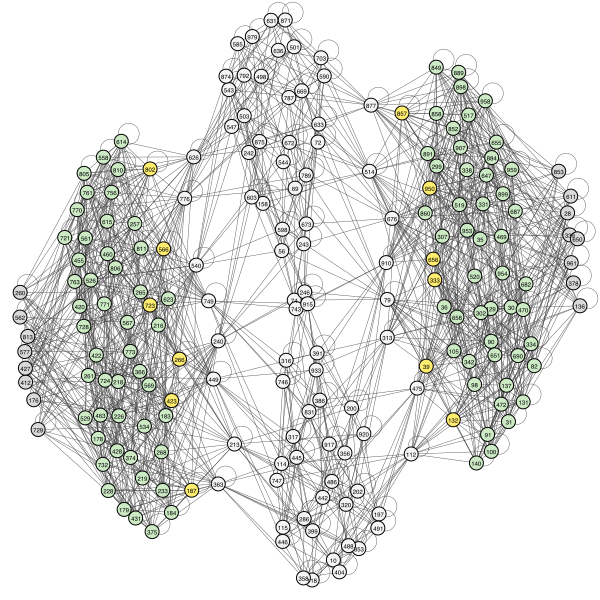

In [92]:
highlight = [np.where(np.abs(evecs[:, 0]) < 1e-10)[0]]

color = sub_sub_ig.vs["color"]
for i, nodes in enumerate(highlight):
    for node in nodes:
        color[node] = "whitesmoke"
sub_sub_ig.vs["color"] = color

igraph.plot(
    sub_sub_ig,
    layout=sub_sub_ig.layout_kamada_kawai(),
    vertex_size=14,
    vertex_label_size=6,
    edge_width=0.4,
    # edge_color="darkgray",
    # target="qdm_graph_4x2.svg"
)

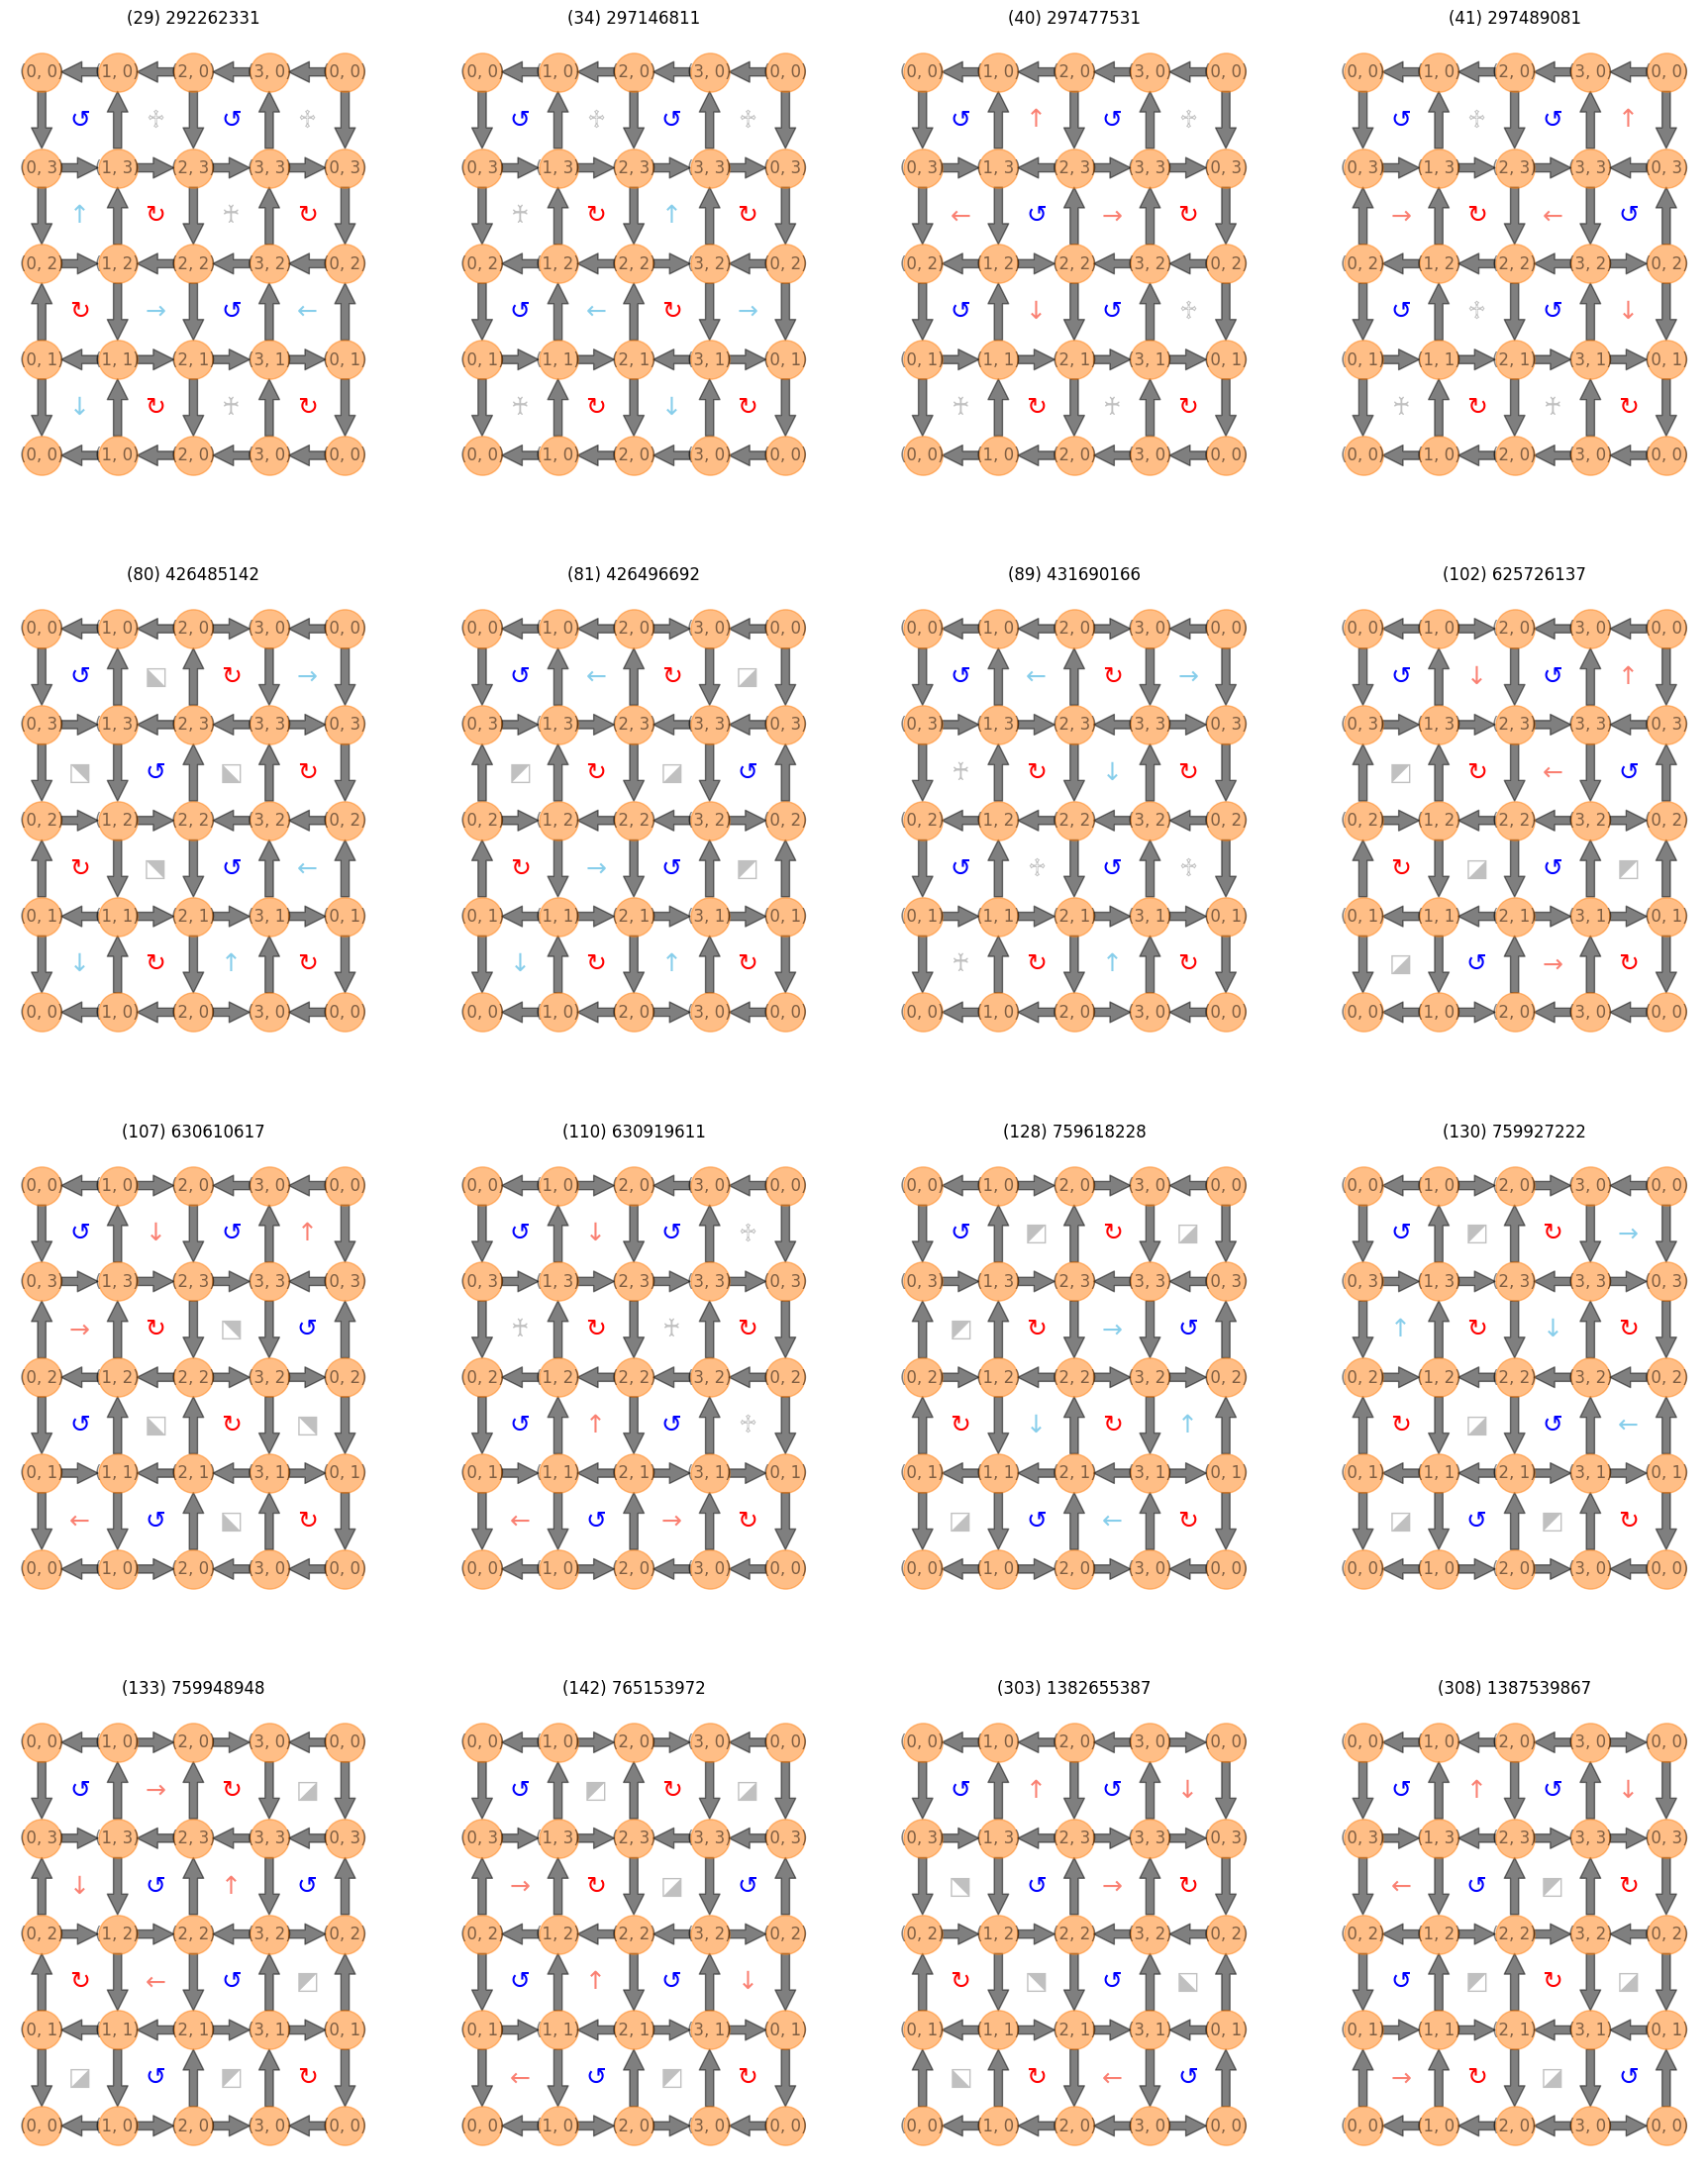

In [59]:
fig, axes = plt.subplots(4, 4, figsize=(22, 28), facecolor="white")
ax = axes.flatten()

state = aut.type_1_scars((8, 'B'), fill_zeros=True)[0]
# np.where(np.any(np.abs(state) > 1e-10, axis=1))[0]
# 

for i, val in enumerate(state.node_idx[np.where(np.any(np.abs(state.evec[state.node_idx, :]) > 1e-12, axis=1))[0]][:16]):
    g = BasisVisualizer(SquareLattice(*model.shape, basis.dataframe.iloc[val]))
    g.plot(show=False, ax=ax[i], node_size=800, fontsize=18)
    ax[i].set_title(f"{df.index[val]}")

In [58]:
fig.savefig("qlm_basis_4x4_relevant_orbits.svg", format="svg")

/var/folders/9z/xvqzg2q52gd8hxzhj2vgzrpm0000gn/T/ipykernel_24373/2583174820.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


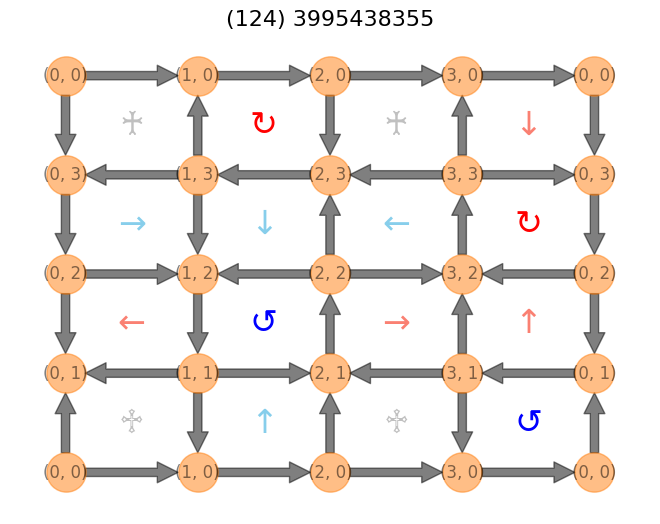

In [15]:
g = BasisVisualizer(SquareLattice(*model.shape, basis.dataframe.iloc[124]))
g.plot(show=False, node_size=800)
plt.title(f"{df.index[124]}", fontsize=16)
plt.tight_layout()
# plt.savefig("qdm_basis_4x4.svg", format="svg")

In [ ]:
coup_j = np.ones((np.prod(model.shape), 1))
coup_j[3] = 1.2
energy_lump_model = QuantumLinkModel(coup_j, coup_rk, model.shape, basis)
energy_lump_ham = energy_lump_model.hamiltonian

# scar_state = np.zeros((basis.n_states, 1))
# scar_state[np.array([25, 26, 67, 68]), 0] = np.array([1, -1, -1, 1])
# scar_state /= np.linalg.norm(scar_state)
scar_state = evecs[:, 78]

start, stop, num = 0, 400, 100
evol_states = expm_multiply(-1j * energy_lump_ham, scar_state, start=start, stop=stop, num=num)
fidelity = [np.abs(evol_state.T @ scar_state).item() ** 2 for evol_state in evol_states]
rate_func = [-np.log(evol_state.T @ scar_state).item() for evol_state in evol_states]
entropy = [model.entropy(evol_state.flatten(), 2, 0) for evol_state in evol_states]

plt.plot(np.linspace(start, stop, num), fidelity, linestyle="--", marker="o")
plt.ylim(0.0001, 1.1)
# plt.yscale('log')
plt.xlabel("t")
plt.ylabel("Fidelity(t)")
plt.tight_layout()
plt.show()

plt.plot(np.linspace(start, stop, num), rate_func, linestyle="--", marker="o")
# plt.yscale('log')
plt.xlabel("t")
plt.ylabel("rate_func(t)")
plt.tight_layout()
plt.show()

plt.plot(np.linspace(start, stop, num), np.round(entropy, 12), linestyle="--", marker="o")
plt.xlabel("t")
plt.ylabel("EE(t)")
plt.tight_layout()
plt.show()

final_state = np.real_if_close(evol_states[-1], tol=1e-12)
print(f"final fidelity = {fidelity[-1]}")
print(f"O_kin @ psi_scar = {(model.kinetic_term @ final_state).flatten()}")
print(f"<O_kin> = {(final_state.T @ model.kinetic_term @ final_state).item()}")
print(f"<O_pot> = {(final_state.T @ model.potential_term @ final_state).item()}")
print(f"<H> = {(final_state.T @ model.hamiltonian @ final_state).item()}")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")
ax.set_prop_cycle(color=plt.cm.tab20(np.linspace(0, 1, 3)), marker=["o", "^", "d"])

for i, epsilon in enumerate([0.05, 0.1, 0.15]):
    coup_j = np.ones((np.prod(model.shape), 1))
    coup_j[5] += epsilon
    energy_lump_model = QuantumLinkModel(coup_j, coup_rk, model.shape, basis)
    energy_lump_ham = energy_lump_model.hamiltonian

    scar_state = np.zeros((basis.n_states, 1))
    scar_state[np.array([25, 26, 67, 68]), 0] = np.array([1, -1, -1, 1])
    scar_state /= np.linalg.norm(scar_state)
    # scar_state = evecs[:, 77]

    start, stop, num = 0, 400, 100
    evol_states = expm_multiply(-1j * energy_lump_ham, scar_state, start=start, stop=stop, num=num)
    # fidelity = [np.abs(evol_state.T @ scar_state).item() ** 2 for evol_state in evol_states]
    rate_func = [-np.log(evol_state.T @ scar_state).item() for evol_state in evol_states]
    # entropy = [model.entropy(evol_state.flatten(), 1, 0) for evol_state in evol_states]

    # ax.plot(np.linspace(start, stop, num), fidelity, linestyle="--")
    # ax.plot(np.linspace(start, stop, num), np.round(entropy, 12), linestyle="--")
    ax.plot(np.linspace(start, stop, num), rate_func, linestyle="--")

ax.legend([f"epsilon = {epsilon}" for epsilon in [0.05, 0.1, 0.15]], fontsize=16, loc="upper right")
# plt.ylim(0.0001, 1.1)
plt.title("QDM 4x4", fontsize=18)
plt.xlabel("t", fontsize=18)
plt.ylabel("Rate_Func(t)", fontsize=18)
plt.tight_layout()

In [ ]:
import pyvis.network as nt

net = nt.Network(filter_menu=True, select_menu=True, font_color="black")
net.from_nx(g)
for node in net.nodes:
    node["title"] = str(node["id"])
net.show_buttons(filter_=["nodes", "edges", "physics"])
net.write_html("nx.html")

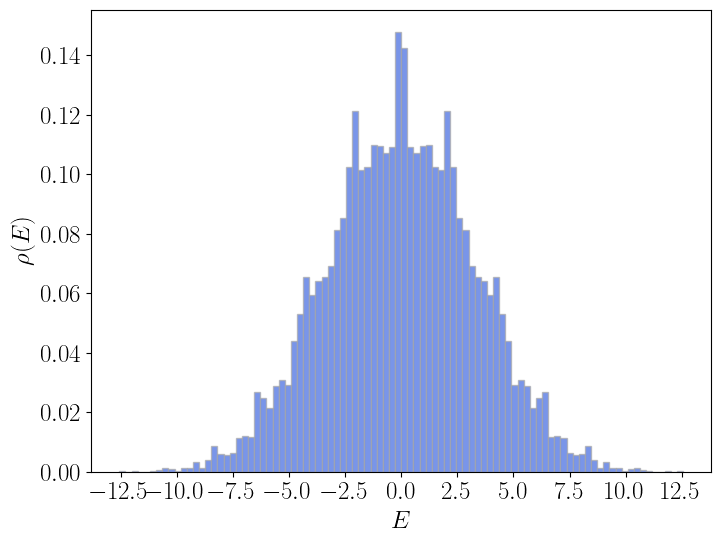

In [10]:
import matplotlib.ticker as ticker

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "font.size": 18
})

fig, ax = plt.subplots(figsize=(8, 6), facecolor="white")
ax.hist(evals, bins="auto", density=True, alpha=0.7, color='royalblue', edgecolor='darkgray')
ax.set_ylabel(r"$\rho(E)$")
ax.set_xlabel(r"$E$")
ax.xaxis.set_major_locator(ticker.MultipleLocator(2.5))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.025))
# plt.grid()
# plt.savefig("qdm_8x4_kin_dos.svg", dpi=300, format="svg")